# **Lista 2**

Nome do aluno: Kleber Vasconcelos Oliveira Junior

# **Questão 1. (1 ponto)**

Nesta lista utilizaremos um dataset conhecido, o Pima Indians Diabetes Dataset.



In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

CSV_FILE = "../datasets/diabetes.csv"
df = pd.read_csv(CSV_FILE)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df[df.columns[:-1]].values
y = df['Outcome'].values
print(len(y))

768


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)




### A) Complete a variável 'K' com valores 'k' condizentes para o KNN.

### B) Adicione, nas listas de treino e teste, as acurácias do modelo knn treinado. Vide documentação para obter a acurácia.

* Obs: utilizar X_train, y_train para acurácia do treino e X_test e y_test para acurácia do teste.


Para mais informações:
[sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

K =  [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55]
accuracy_training = []
accuracy_testing  = []

for i in ((K)):
  knn = KNeighborsClassifier(n_neighbors=i)

  knn.fit(X_train, y_train)
  
  y_pred_train = knn.predict(X_train)
  train_accuracy = knn.score(X_train, y_train)
  accuracy_training.append(train_accuracy)


  y_pred_test = knn.predict(X_test)
  test_accuracy = knn.score(X_test, y_test)
  accuracy_testing.append(test_accuracy)
  

  # Complete vide "B)"

### C) Gere um plot com a acurácia dos dados de treinamento e outro com os dados de teste. Os eixos devem ser compostos da maneira a seguir:
* Eixo x: valores de k
* Eixo y: valores da acurácia

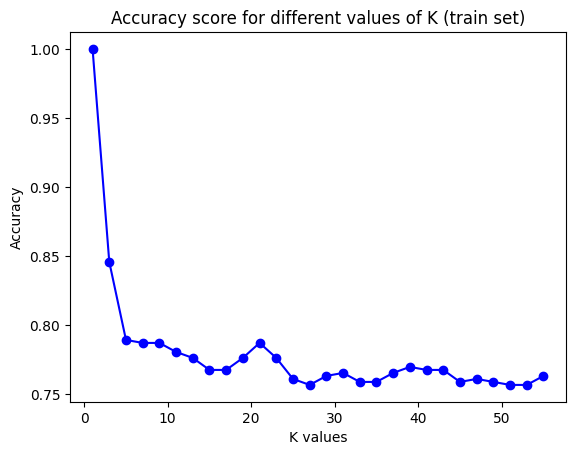

In [6]:
plt.title('Accuracy score for different values of K (train set)')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.plot(K, accuracy_training, 'bo-')
plt.show()

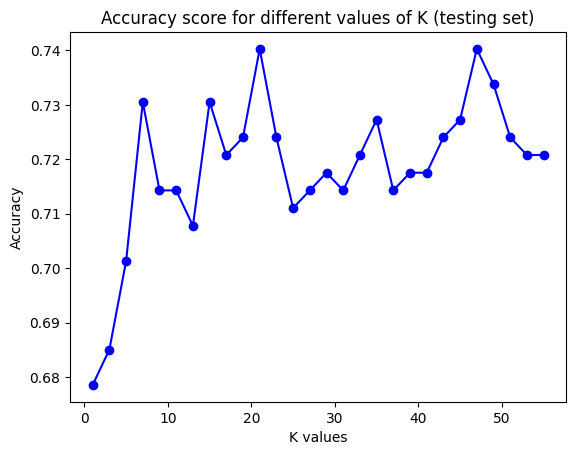

In [7]:
plt.title('Accuracy score for different values of K (testing set)')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.plot(K, accuracy_testing, 'bo-')
plt.show()

# **Questão 2. (0,5 ponto)**


<b>A) Avaliando a questão anterior, como pode ser definido um bom valor de k para o modelo?</b>

R: Fazemos um estudo de valores de k dentro de um intervalo e avaliamos a acurácia para cada k.

<b>B) Discorra sobre o valor de *k = 1* em modelos de *KNN*.</b>

R: Como selecionamos apenas 1 vizinho e as classes são bem separadas, o ponto de teste mais próximo dele será o mesmo que o ponto de teste.

<b>C) Descreva uma justificativa para o uso de *KNN* como modelo preditivo nesse dataset.</b>

R: Existem duas classes bem definidas, e a simplicidade do classificador KNN nos permite focar no problema, sem a necessidade de se preocupar com a complexidade do modelo.

# **Questão 3. (1 ponto)**
### Com o mesmo código da questão anterior, adapte-o para utilizar o modelo preditivo do Naive Bayes. Em seguida, compare os resultados, avaliando os *scores* de cada tipo de modelo Naive Bayes.

### Para mais informações:
* [sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.score)
* [sklearn.naive_bayes.MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)
* [sklearn.naive_bayes.BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)

* OBS: Lembrar de mudar os parâmetros das funções para um possível melhor resultado.

In [8]:
df = pd.read_csv(CSV_FILE)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
X = df[df.columns[:-1]].values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


In [10]:

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

def gaussian(clf,name, X_train, y_train, X_test, y_test):

    print(f"Classifier: {name}\n")
    classifier = clf
    classifier.fit(X_train, y_train)

    train_score = classifier.score(X_train, y_train)
    print(f"Train score: {train_score}")


    test_score = classifier.score(X_test, y_test)
    print(f"Test score: {test_score}")


In [11]:
##GaussianNB
clf = GaussianNB()
gaussian(clf, "Gaussian NB", X_train, y_train, X_test, y_test)   

Classifier: Gaussian NB

Train score: 0.782608695652174
Test score: 0.7337662337662337


In [12]:
##MultinomiaNB
clf = MultinomialNB()
gaussian(clf, "Multinomia Naive Bayes", X_train, y_train, X_test, y_test)  

Classifier: Multinomia Naive Bayes

Train score: 0.5978260869565217
Test score: 0.5811688311688312


In [13]:
##Bernoulli NB
clf = BernoulliNB()
gaussian(clf, "Bernoulli NB", X_train, y_train, X_test, y_test)  

Classifier: Bernoulli NB

Train score: 0.6521739130434783
Test score: 0.6396103896103896


# **Questão 4. (1 ponto)**


<b>A) Descreva se teve alguma mudança significativa na comparação dos modelos preditivos, tanto entre tipos de Naive Bayes, quanto entre Naive Bayes e KNN.</b>

R: Sim, sendo o gaussian Naive Bayes o mais preciso, porém o KNN ainda foi mais eficiente.

<b> B) Cite algum caso específico em que Naive Bayes pode ser mais vantajoso do que KNN e vice-versa. </b>

R: KNN para conjuntos ruidosos e Naive Bayes para conjuntos com alta dimensionalidade.

# **Questão 5. (1 ponto)**

 Avalie a base de dados de Pima Indians Diabetes pela acurácia, utilizando Regressão Linear e Regressão Logística.

* Obs: Lembrar de mudar os parâmetros para ser compatível com as regressões respectivas.

<b> A) Explique como o *fitting* da Regressão Logística se diferencia da Regressão Linear.</b>

R: O fitting da Regressão Linear minimiza a soma dos quadrados dos resíduos, enquanto o da Regressão Logística maximiza a verossimilhança dos dados observados sob o modelo logístico.

<b>B) Em quais contextos a Regressão Logística é preferível de se utilizar do que a Linear?</b>

R: Para classificação é mais adequado o uso da Regressão Logística, para regrassão é mais indicado o uso da Regressão Linear.

In [14]:
df = pd.read_csv(CSV_FILE)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
X = df[df.columns[:-1]].values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


In [16]:
from sklearn.linear_model import LinearRegression, LogisticRegression

#Linear Regression
lr = LinearRegression(n_jobs=1000)
lr.fit(X_train, y_train)

#Evaluating training score
print("Training Score:", lr.score(X_train, y_train))

#Evaluating test score
print("Test Score:", lr.score(X_test, y_test))


Training Score: 0.31270104722862524
Test Score: 0.2818848560387851


In [17]:
#Logistic Regression
lr = LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear', random_state=42)
lr.fit(X_train, y_train)

#Evaluating training score
print("Training Score:", lr.score(X_train, y_train))

#Evaluating test score
print("Test Score:", lr.score(X_test, y_test))

Training Score: 0.7956521739130434
Test Score: 0.7402597402597403


# **Questão 6. (0,5 ponto)**
## Analise a árvore abaixo e utilize-a para explicar as propriedades do problema.

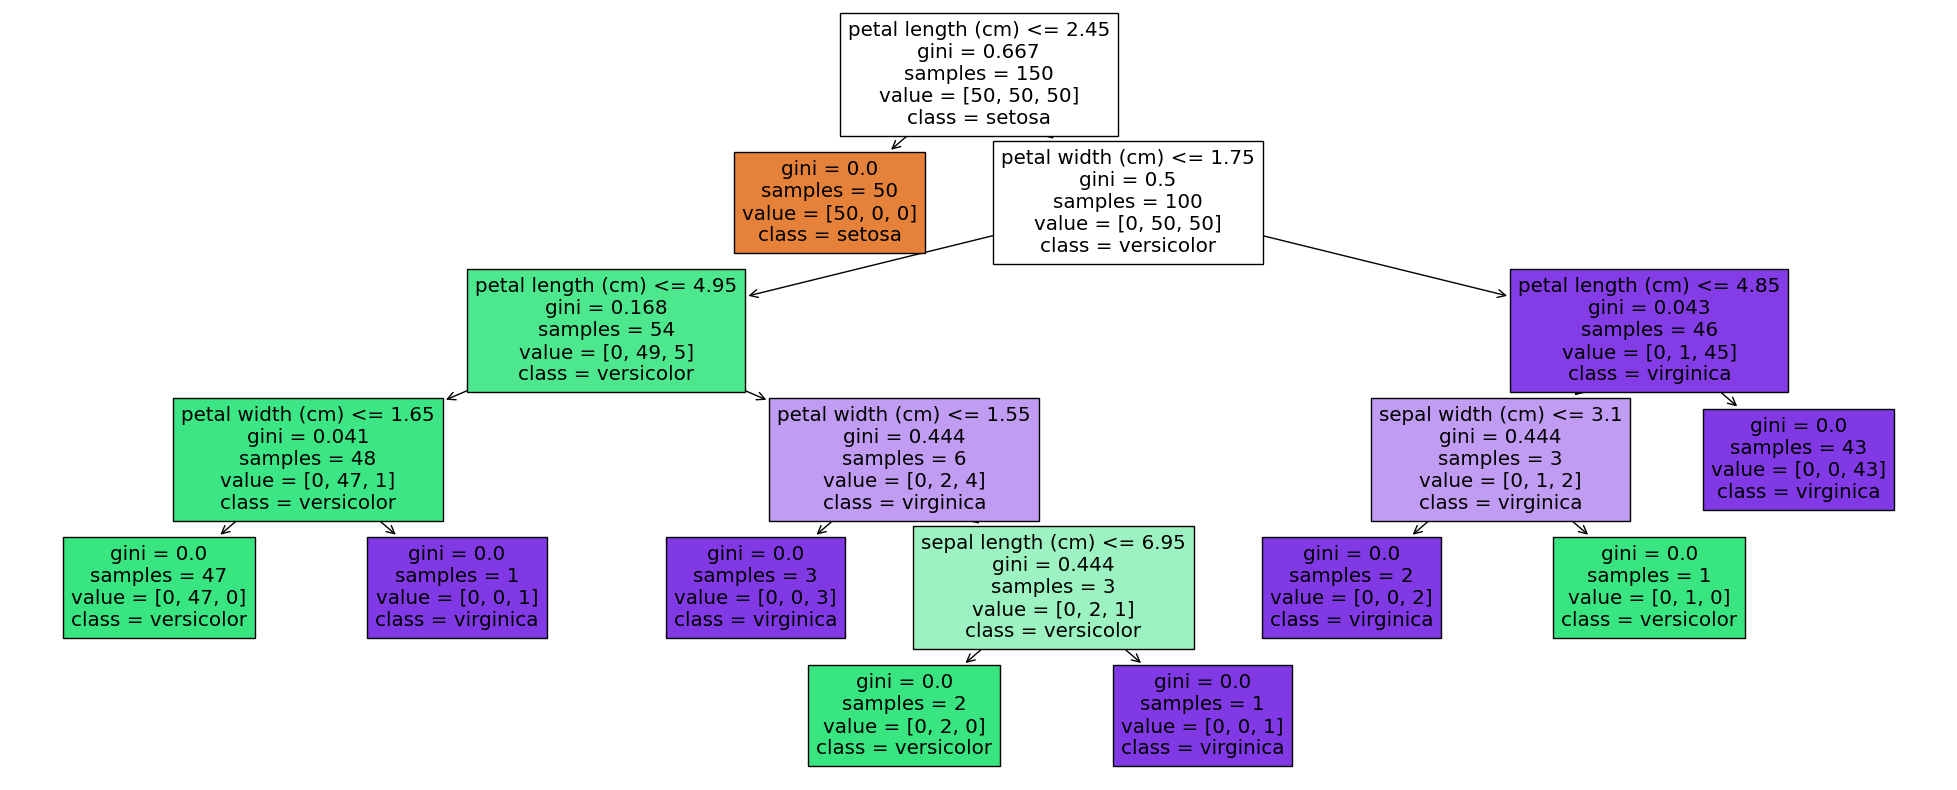

In [18]:
from sklearn import tree
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

R: O problema toma como base a altura e largura da pétala para realizar a classificação.

# **Questão 7. (0,5 ponto)**
 <b>Analise o gráfico da importância que a árvore dá para cada feature, retire insights sobre fatores de riscos da diabetes.</b>

 R: O nível de glicose é a principal variável, dentro deste escolo. Junto a isso temos o peso e idade do paciente.


# **Questão 8. (2 pontos)**


---



Colete 2 bases de dados diferentes na internet e utilize a biblioteca *pymfe* para extrair as metafeatures de cada uma, depois calcule a distância euclidiana de cada base e mostre quais são as mais próximas.



Dica: utilize sites como o openML e o kaggle para obter as bases de dados e olhe a documentação da biblioteca em https://pypi.org/project/pymfe/


In [72]:
import pandas as pd
from pymfe.mfe import MFE
from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.filterwarnings('ignore')


data1 = pd.read_csv(CSV_FILE)
data2 = pd.read_csv("../datasets/Raisin_Dataset.csv")

In [80]:
del data1['SkinThickness']
data1.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [73]:

X1= data1[data1.columns[:-1]].values
y1 = data1['Outcome'].values


In [74]:
data2.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [75]:
X2 = data2[data2.columns[:-1]].values
y2 = data2['Class'].values

print(y2)

['Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen' 'Kecimen'
 'Keci

In [98]:
# Extracting metafeatures
def extract_features(X,y):
    mfe = MFE()
    mfe.fit(X, y)
    ft = mfe.extract()
    return ft

mf1 = extract_features(X=X1, y=y1)
mf2 = extract_features(X=X2, y=y2)

In [97]:
mf1

array([['attr_conc.mean', 'attr_conc.sd', 'attr_ent.mean', 'attr_ent.sd',
        'attr_to_inst', 'best_node.mean', 'best_node.sd', 'can_cor.mean',
        'can_cor.sd', 'cat_to_num', 'class_conc.mean', 'class_conc.sd',
        'class_ent', 'cor.mean', 'cor.sd', 'cov.mean', 'cov.sd',
        'eigenvalues.mean', 'eigenvalues.sd', 'elite_nn.mean',
        'elite_nn.sd', 'eq_num_attr', 'freq_class.mean', 'freq_class.sd',
        'g_mean.mean', 'g_mean.sd', 'gravity', 'h_mean.mean',
        'h_mean.sd', 'inst_to_attr', 'iq_range.mean', 'iq_range.sd',
        'joint_ent.mean', 'joint_ent.sd', 'kurtosis.mean', 'kurtosis.sd',
        'leaves', 'leaves_branch.mean', 'leaves_branch.sd',
        'leaves_corrob.mean', 'leaves_corrob.sd', 'leaves_homo.mean',
        'leaves_homo.sd', 'leaves_per_class.mean', 'leaves_per_class.sd',
        'lh_trace', 'linear_discr.mean', 'linear_discr.sd', 'mad.mean',
        'mad.sd', 'max.mean', 'max.sd', 'mean.mean', 'mean.sd',
        'median.mean', 'median.sd

In [90]:
mf2

(['attr_conc.mean',
  'attr_conc.sd',
  'attr_ent.mean',
  'attr_ent.sd',
  'attr_to_inst',
  'best_node.mean',
  'best_node.sd',
  'can_cor.mean',
  'can_cor.sd',
  'cat_to_num',
  'class_conc.mean',
  'class_conc.sd',
  'class_ent',
  'cor.mean',
  'cor.sd',
  'cov.mean',
  'cov.sd',
  'eigenvalues.mean',
  'eigenvalues.sd',
  'elite_nn.mean',
  'elite_nn.sd',
  'eq_num_attr',
  'freq_class.mean',
  'freq_class.sd',
  'g_mean.mean',
  'g_mean.sd',
  'gravity',
  'h_mean.mean',
  'h_mean.sd',
  'inst_to_attr',
  'iq_range.mean',
  'iq_range.sd',
  'joint_ent.mean',
  'joint_ent.sd',
  'kurtosis.mean',
  'kurtosis.sd',
  'leaves',
  'leaves_branch.mean',
  'leaves_branch.sd',
  'leaves_corrob.mean',
  'leaves_corrob.sd',
  'leaves_homo.mean',
  'leaves_homo.sd',
  'leaves_per_class.mean',
  'leaves_per_class.sd',
  'lh_trace',
  'linear_discr.mean',
  'linear_discr.sd',
  'mad.mean',
  'mad.sd',
  'max.mean',
  'max.sd',
  'mean.mean',
  'mean.sd',
  'median.mean',
  'median.sd',
  'mi

# **Questão 9. (0,5 ponto)**

Qual a importância de usar as metafeatures para obter informações das bases de dados durante o processo de recomendação de algoritmos?

R: Encontrar os hiperparâmetros, ajudar na seleção do(s) melhor(es) algoritmo(s).

# **Segunda parte do Projeto (2 pontos)**
Com base nos conhecimentos adquiridos nas aulas e da Lista 1, 2, de continuidade a parte do projeto. Para avaliação desta questão, faça os seguintes passos:


* Escolha algum algoritmo de classificação;
* Use técnicas de valiação de modelo e preveja alguns resultados a partir do modelo;
* Use alguma técnica Séries Temporais;
* Use alguma técnica Visulização de dados;
* Tire alguns ideias (insights) e mostre conclusões.

Cross Validation Scores: [0.94285714 0.88571429 0.88571429 0.94117647 0.91176471]
Média dos Scores: 0.9134453781512606
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       0.00      0.00      0.00         2

    accuracy                           0.95        44
   macro avg       0.48      0.50      0.49        44
weighted avg       0.91      0.95      0.93        44



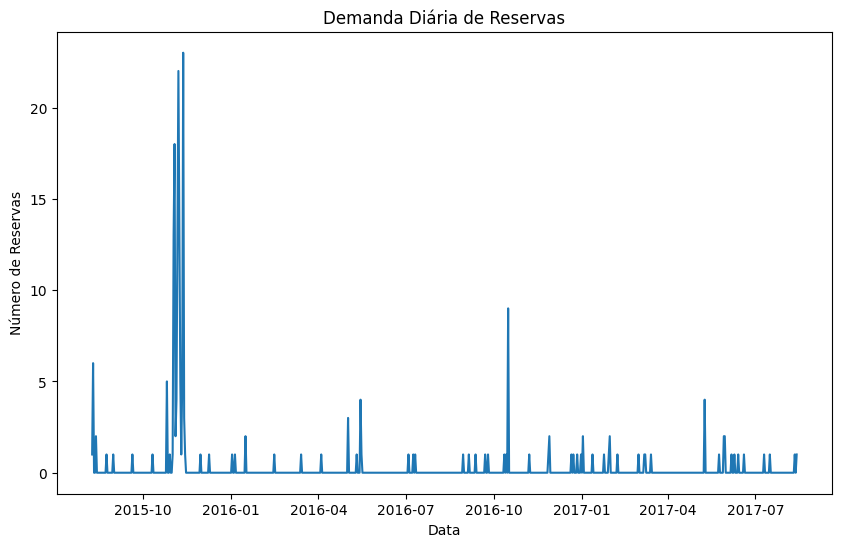

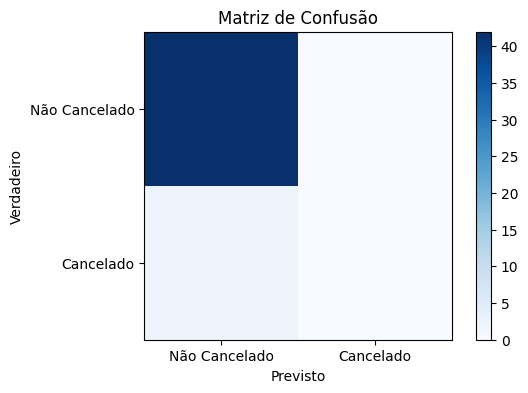

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.tsa.arima.model import ARIMA

# Carregando o conjunto de dados
hotel_data = pd.read_csv('../datasets/hotel_bookings.csv')
hotel_data = hotel_data.dropna()

 
# Passo 1: Escolha do Algoritmo de Classificação
# Usaremos algumas características dos hóspedes para prever se a reserva será cancelada ou não
X = hotel_data[['lead_time', 'adults', 'children', 'babies', 'is_repeated_guest']]
y = hotel_data['is_canceled']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Passo 2: Técnicas de Avaliação de Modelo
# Validando o modelo com validação cruzada
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Média dos Scores:", np.mean(cv_scores))

# Avaliando o modelo no conjunto de teste
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Passo 3: Previsão com Séries Temporais
# Criando uma série temporal com as datas de reserva
time_series_data = hotel_data[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].copy()
time_series_data['date'] = pd.to_datetime(time_series_data.astype(str).agg('-'.join, axis=1))
time_series_data.set_index('date', inplace=True)

# Calculando a demanda diária
daily_demand = time_series_data.resample('D').size()

# Passo 4: Técnica de Visualização de Dados
# Visualizando a demanda ao longo do tempo
plt.figure(figsize=(10,6))
plt.plot(daily_demand.index, daily_demand.values)
plt.title('Demanda Diária de Reservas')
plt.xlabel('Data')
plt.ylabel('Número de Reservas')
plt.show()

# Visualizando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusão')
plt.colorbar()
plt.xticks([0,1], ['Não Cancelado', 'Cancelado'])
plt.yticks([0,1], ['Não Cancelado', 'Cancelado'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()
